# Mock data generator

© Pablo Jimeno - 2018

Use this code to generate some mock data to test the `mcmc_analysis` code.
* The data will be saved in `mock_data.csv`, located in the `working_dir` directory.
* Data generated is of the form: [ id, x, y, $\sigma_y$ ].
* There is no covariance between the points.

### Initialization

* Import code packages.
* Set working directory `working_dir`.

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import style_plots
plt.style.use(style_plots.style)
%matplotlib notebook
from scipy.optimize import minimize
from scipy.special import logsumexp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import emcee
from getdist import plots, MCSamples
from utilities_mcmc_analysis import *

#working_dir = '/path/to/working/dir'
working_dir = os.getcwd()

### Define model function and data range

Define:

1. `mock_data_function`: the model function which we will try to fit.
2. `params_true`: the "real" parameters of the mock data function.
3. `x_min`, `x_max`: the x range in which to generate mock data.
4. `n_points`: number of data points to be generated.
5. `minimum_noise`: the minimum amount of error in each point.
6. `level_noise`: extra error will be drawn from [0, noise_level)

In [32]:
def mock_data_function(x_input, A, B, C):
    x = x_input[0]
    return A + B*x + C*x**2

params_true = (10., 1., 0.3)

x_min, x_max = -2., 10.

n_points = 20

minimum_noise = 1.
level_noise = 2.5

### Generate mock data

Each time the cell below is executed, a new mock data set is generated and plotted.

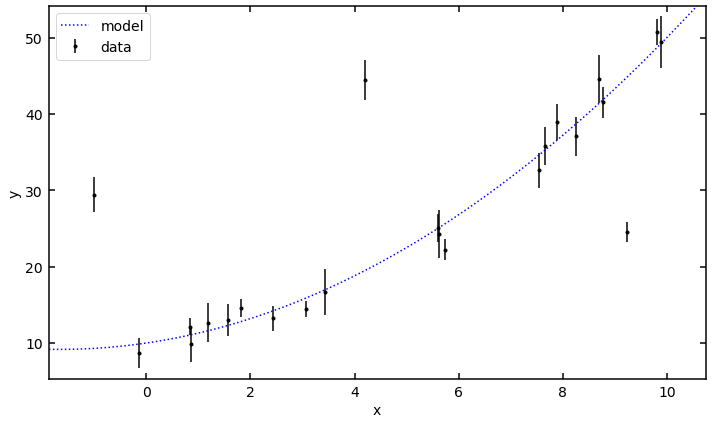

In [82]:
#================================================================================
## Create some model values to plot the "real" model:
x_model = np.linspace(2*x_min, 2*x_max, 100)
y_model = mock_data_function([x_model], *params_true)

## Then, create some mock data, first without noise:

x_data = np.sort(np.random.random(n_points)*(x_max - x_min) + x_min)
y_true = mock_data_function([x_data], *params_true)

## And then, generate some noise:
y_error = minimum_noise + level_noise*np.random.random(len(y_true)) # Generates 

## And displace the data as a function of that error:
y_data = y_true + y_error*np.random.normal(size=len(y_true)) # 1 sigma (gaussian) error

## Finally, we add some mock outliers in the [x_min - x_max, y_min - y_max] range:
n_outl = 3
x_outl = np.random.random(n_outl)*(x_max - x_min) + x_min
y_outl = np.random.random(n_outl)*(y_data.max() - y_data.min()) + y_data.min()
y_error_outl = minimum_noise + level_noise*np.random.random(n_outl) ## Genera un valor entre [0, noise_level)

x_data = np.concatenate((x_data, x_outl), axis=0)
y_data = np.concatenate((y_data, y_outl), axis=0)
y_error = np.concatenate((y_error, y_error_outl), axis=0)

so = np.argsort(x_data)
data = np.array([x_data[so], y_data[so], y_error[so]]).T

#================================================================================
## Plot the resulting data:


plt_input_data = [data[:,0]]
plt_y_data = (data[:,1], data[:,2])

plt_data = (plt_input_data, plt_y_data)

plot_data(None, plt_data, include_model_func=mock_data_function, model_params=params_true, save=False)

### Save the mock data

Mock data is saved to `mock_data.csv`, located in `working_dir`.

In [83]:
#================================================================================
## Save the mock data:

filename = '{}/mock_data.csv'.format(working_dir)

df = pd.DataFrame(data, columns=['x', 'y', 'y_err'])

df.to_csv(filename, header=True, index_label='id', float_format='%10.5f',
          encoding='utf-8')   